In [40]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import os
os.chdir("E:/Masaüstü/bootcamp") 

In [41]:

ad=pd.read_csv("https://raw.githubusercontent.com/UVBMOB/Ankara2019/master/Verisetleri/hmelq.csv")
df=ad.copy()
df.dropna(inplace=True)
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [5]:
sns.pairplot(df.drop(["bad","reason","job"],axis=1),kind="reg")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002563E7F0400> (for post_execute):


KeyboardInterrupt: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 8 columns):
reason_DebtCon    2018 non-null uint8
reason_HomeImp    2018 non-null uint8
job_Mgr           2018 non-null uint8
job_Office        2018 non-null uint8
job_Other         2018 non-null uint8
job_ProfEx        2018 non-null uint8
job_Sales         2018 non-null uint8
job_Self          2018 non-null uint8
dtypes: uint8(8)
memory usage: 31.5 KB


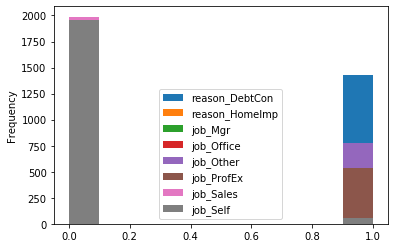

In [42]:
dms=pd.get_dummies(df[["reason","job"]])
dms.head()
dms.info()
pd.DataFrame(dms).plot.hist()

In [66]:
y=df["bad"]
X_=df.drop(["bad","reason","job"],axis=1).astype("float64")
X_.head()
X=pd.concat([X_,dms[["reason_DebtCon","job_Office","job_Other","job_ProfEx","job_Sales","job_Self"]]],axis=1)
X.tail()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_DebtCon,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
3544,7200.0,15637.0,39660.0,6.0,0.0,1.0,354.24,3.0,42.0,33.624,0,0,0,0,0,1
3546,53400.0,228236.0,305514.0,6.0,0.0,0.0,11.15,0.0,2.0,34.558,0,0,0,0,0,1
3547,27300.0,106221.0,137727.0,3.0,0.0,0.0,300.57,3.0,45.0,32.560,1,0,0,0,0,1
3548,37300.0,68789.0,86172.0,2.0,0.0,6.0,235.64,2.0,25.0,114.051,0,0,0,0,0,1
3549,13300.0,25698.0,58760.0,15.0,0.0,0.0,147.91,1.0,10.0,30.962,0,0,0,0,0,1


In [67]:

print(y.shape)
print(X.shape)

(2018,)
(2018, 16)


In [68]:
loj=sm.Logit(y,X)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.250245
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2002
Method:                           MLE   Df Model:                           15
Date:                Wed, 25 Sep 2019   Pseudo R-squ.:                  0.1613
Time:                        17:46:50   Log-Likelihood:                -504.99
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 3.162e-33
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -2.173e-05   1.05e-05     -2.061      0.039   -4.24e-05   -1.07e-06
mortdue        -3.231e-06   4.48e-06     -0.722      0.470    -1.2e-05    5.54e-06
value          -1.223e-06   3.77e-06     -0.325      0.745    -8.6e-06    6.16e-06
yoj               -0.0305      0.013     -2.358      0.018      -0.056      -0.005
derog              0.5624      0.130      4.339      0.000       0.308       0.816
delinq             0.7626      0.090      8.488      0.000       0.587       0.939
clage             -0.0074      0.001     -5.636      0.000      -0.010      -0.005
ninq               0.0669      0.047      1.423      0.155      -0.025       0.159
clno              -0.0418      0.011     -3.804      0.000      -0.063      -0.020
debtinc            0.0375      0.008      4.689      0.000       0.022       0.053
reason_DebtCon    -0.4011      0.181     -2.215      0.027      -0.756      -0.046
job_Office        -1.3120      0.296     -4.439      0.000      -1.891      -0.733
job_Other         -0.9919      0.210     -4.734      0.000      -1.403      -0.581
job_ProfEx        -0.8430      0.263     -3.209      0.001      -1.358      -0.328
job_Sales          0.3692      0.573      0.644      0.519      -0.754       1.492
job_Self           0.3051      0.536      0.569      0.569      -0.745       1.355
==================================================================================
"""

In [69]:
#mortdue,value,job_sales,job_self ve ninq değerlerini atıcam çünkü kötü müşteriyi anlamlandırmada önemli değiller
#bir de dummy olan değişkenlerden bazıları anlamsız çıktığında sadece onları çıkarıp anlamlı çıkanlarla devam edebiliyor

In [70]:
#şimdi asıl testim için datayı train ve split olarak ayıracağım ama bu sefer skitlearn ile de yapıcam

In [71]:
y=df["bad"]
X=X.drop(["ninq","mortdue","value","job_Sales","job_Self"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [72]:
loj=sm.Logit(y_train,X_train)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.256205
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1603
Method:                           MLE   Df Model:                           10
Date:                Wed, 25 Sep 2019   Pseudo R-squ.:                  0.1439
Time:                        17:46:59   Log-Likelihood:                -413.51
converged:                       True   LL-Null:                       -483.05
Covariance Type:            nonrobust   LLR p-value:                 6.543e-25
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -2.362e-05   1.07e-05     -2.200      0.028   -4.47e-05   -2.58e-06
yoj               -0.0327      0.014     -2.286      0.022      -0.061      -0.005
derog              0.5568      0.144      3.875      0.000       0.275       0.838
delinq             0.7694      0.099      7.769      0.000       0.575       0.963
clage             -0.0075      0.001     -5.407      0.000      -0.010      -0.005
clno              -0.0416      0.011     -3.697      0.000      -0.064      -0.020
debtinc            0.0315      0.008      3.977      0.000       0.016       0.047
reason_DebtCon    -0.3223      0.195     -1.653      0.098      -0.705       0.060
job_Office        -1.2741      0.310     -4.109      0.000      -1.882      -0.666
job_Other         -1.0637      0.215     -4.939      0.000      -1.486      -0.642
job_ProfEx        -0.8911      0.268     -3.328      0.001      -1.416      -0.366
==================================================================================
"""

In [73]:
#birde skitlearnle yapalım

In [74]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
loj_model.intercept_

array([-1.54541287])

In [76]:
loj_model.coef_

array([[-1.61447543e-05, -2.96638297e-02,  6.06044558e-01,
         7.97736279e-01, -5.97211957e-03, -4.14702241e-02,
         5.08124394e-02, -2.89540052e-01, -6.41631601e-01,
        -5.87311009e-01, -3.77840156e-01]])

In [77]:
#şimdi testlere geçelim ve modelin doğruluğuna bakalım

In [78]:
y_pred=loj_model.predict(X_test)
confusion_matrix(y_test,y_pred)
a=confusion_matrix(y_test,y_pred)
a

array([[368,   1],
       [ 30,   5]], dtype=int64)

In [79]:
#0 ların çoğunluğunu doğru bilirken 1 lerin çoğunluğunu yanlış biliyoruz

In [80]:
accuracy_score(y_test,y_pred)

0.9232673267326733

In [81]:
#accuracy çok yüksek çıktı ama yanlış bir şeyler var

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       0.83      0.14      0.24        35

    accuracy                           0.92       404
   macro avg       0.88      0.57      0.60       404
weighted avg       0.92      0.92      0.90       404



In [83]:
#modelin 1 leri tahmin etmede bariz bir sıkıntısı var

In [84]:
#son olarak ROC grafiği çizdiriyorum

In [85]:
logit_roc_auc=roc_auc_score(y_test,loj_model.predict(X_test))
logit_roc_auc
#roc un altında kalan alan kötü

0.5700735578784358

In [86]:
fpr,tpr,thresholds=roc_curve(y_test,loj_model.predict_proba(X_test)[:,1])
print(fpr[0:10])
print(tpr[0:10])
print(thresholds[0:10])

[0.         0.         0.         0.00271003 0.00271003 0.00542005
 0.00542005 0.00813008 0.00813008 0.01355014]
[0.         0.02857143 0.05714286 0.05714286 0.22857143 0.22857143
 0.25714286 0.25714286 0.28571429 0.28571429]
[1.97054039 0.97054039 0.95381043 0.78083064 0.39968195 0.39228648
 0.38326916 0.32861726 0.31251662 0.30678159]


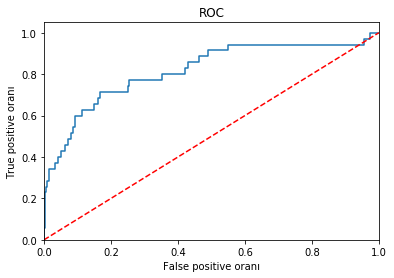

In [87]:
plt.figure()
plt.plot(fpr,tpr,label="AUC (area=%0.2f)"%logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive oranı")
plt.ylabel("True positive oranı")
plt.title("ROC")
plt.show()

In [38]:
#modelin kötü olduğu anlaşılıyor